# Student Score Predictor

You are part of an AI Engineering team in AI Singapore (AISG) that builds AI solutions to solve problem statements from the public and private sectors. Your current client is U.A Secondary School, a public educational institute in Singapore. 

U.A Secondary School wants AISG to build a model that can predict the students’ O-level mathematics examination scores to identify weaker students prior to the examination timely.
Additional support can then be rendered to the students to ensure they are more prepared for the upcoming test. You are given access to U.A Secondary School's past students’ performance dataset (a link to retrieve the dataset can be found in the Data section below).

## Life Cycle of this project: 
1. Problem Statement
2. Data Collection
3. Data Preparation
4. Exploratory Data Analysis
5. Model Building
6. Model Validation and Testing
7. Model Deployment
8. Model Maintenance
9. Documentation and Reporting
10. Review and Iteration

## 1. Problem Statement
- U.A Secondary School wants to identify weaker students prior to the examination timely in order to render additional support to the students to ensure they are more prepared for the upcoming test. 

## Objectives
- To build a model that can predict the students' O-level mathematics examination scores.

## 2. Data Collection
- Data Source Identification: https://techassessment.blob.core.windows.net/aiap-preparatory-bootcamp/score.db
- The dataset is provided by AI Singapore. 

### 2.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

# Matplotlib customizations
plt.style.use('ggplot')

# Set option for dataframe 
pd.set_option('display.max_columns', 50)

# Set random seed
np.random.seed(373)

### 2.2 Query the database 

In [2]:
# Create connection
conn = sqlite3.connect('data/score.db')

# Store query result in score 
score = pd.read_sql_query('SELECT * FROM score', conn)

## 3. Data Preparation

###  3.1 Dataset Features Understanding

|No.| Attribute | Description |
|:--|:--|:--|
|1|student_id|Unique ID for each student|
|2|number_of_siblings|Number of siblings|
|3|direct_admission|Mode of entering the school| 
|4|CCA|Enrolled CCA|
|5|learning_style|Primary learning style|
|6|tuition|Indication of whether the student has tuition|
|7|final_test|Student's O-level mathematics examination score|
|8|n_male|Number of male classmates|
|9|n_female|Number of female classmates|
|10|gender|Gender type|
|11|age|Age of the student|
|12|hours_per_week|Number of hours student studies per week|
|13|attendance_rate|Attendance rate of the student (%)|
|14|sleep_time|Daily sleeping time (hour:minutes)|
|15|wake_time|Daily waking up time (hour:minutes)|
|16|mode_of_transport|Mode of transport to school|
|17|bag_color|Color of student's bag|

In [3]:
# Check the number of samples and the total features of the dataset.
score.shape

(15900, 18)

In [4]:
# Check the first five rows of the dataset to understand the features and the samples.
score.head()

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow


In [5]:
# Remove the index column
score.drop(columns='index', inplace=True)

In [6]:
# Check the total samples, number of columns, number of non-null counts
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15900 entries, 0 to 15899
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_siblings  15900 non-null  int64  
 1   direct_admission    15900 non-null  object 
 2   CCA                 15900 non-null  object 
 3   learning_style      15900 non-null  object 
 4   student_id          15900 non-null  object 
 5   gender              15900 non-null  object 
 6   tuition             15900 non-null  object 
 7   final_test          15405 non-null  float64
 8   n_male              15900 non-null  float64
 9   n_female            15900 non-null  float64
 10  age                 15900 non-null  float64
 11  hours_per_week      15900 non-null  float64
 12  attendance_rate     15122 non-null  float64
 13  sleep_time          15900 non-null  object 
 14  wake_time           15900 non-null  object 
 15  mode_of_transport   15900 non-null  object 
 16  bag_

In [7]:
# Check that the dtypes are appropriate for the columns
score.dtypes

number_of_siblings      int64
direct_admission       object
CCA                    object
learning_style         object
student_id             object
gender                 object
tuition                object
final_test            float64
n_male                float64
n_female              float64
age                   float64
hours_per_week        float64
attendance_rate       float64
sleep_time             object
wake_time              object
mode_of_transport      object
bag_color              object
dtype: object

In [8]:
# Check the statistics of the dataset 
score.describe()

,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate
count,15900.000000,15405.000000,15900.000000,15900.000000,15900.000000,15900.000000,15122.000000
mean,0.886541,67.165401,13.880000,8.906038,15.213459,10.312579,93.270268
std,0.751346,13.977879,6.552584,6.663852,1.758941,4.461861,7.984230
min,0.000000,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000
25%,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000
50%,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000
75%,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000
max,2.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000


- The mean, min., and max. values of all the features look acceptable except for 'age'.
- The min. value for 'age' is -5. This could be a typo and will be investigated further.
- There are missing values for the count of 'final_test' and 'attendance_rate'.

### 3.2 Data Cleaning

#### 3.2.1 Check and remove duplicates

Check for duplicate rows based on a feature that is unique: student_id. 

In [9]:
# Check for duplicate rows

score[score.duplicated(subset=['student_id'], keep=False)].sort_values(by='student_id')

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
5534,0,No,Clubs,Auditory,00811H,Female,Yes,88.0,21.0,4.0,15.0,8.0,92.0,23:00,7:00,walk,green
12290,0,No,Clubs,Auditory,00811H,Female,Yes,88.0,21.0,4.0,15.0,8.0,92.0,23:00,7:00,walk,white
12270,1,No,Arts,Visual,0195IO,Female,No,52.0,8.0,22.0,16.0,15.0,99.0,22:00,6:00,private transport,yellow
13541,1,No,Arts,Visual,0195IO,Female,No,52.0,8.0,22.0,16.0,15.0,99.0,22:00,6:00,private transport,yellow
4303,0,No,Clubs,Auditory,02RSAH,Female,Yes,64.0,12.0,9.0,15.0,17.0,97.0,22:00,6:00,private transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,0,No,None,Auditory,ZUGVXE,Female,No,67.0,24.0,3.0,16.0,9.0,91.0,21:30,5:30,public transport,blue
4429,1,No,Arts,Auditory,ZZICEC,Female,Yes,54.0,11.0,13.0,15.0,12.0,93.0,22:00,6:00,private transport,green
9953,1,No,Arts,Auditory,ZZICEC,Female,Yes,54.0,11.0,13.0,15.0,12.0,93.0,22:00,6:00,private transport,blue
1241,0,No,None,Visual,ZZNA57,Male,No,72.0,23.0,5.0,16.0,13.0,95.0,21:30,5:30,public transport,green


There are duplicate samples (rows) with the same 'student_id'. The value for the other features with the same 'student_id' are identical except for 'bag_color'. This then confirms that there are duplicated rows and will be dropped. 

In [10]:
# Drop duplicates based on 'student_id' and keep the first occurence of every duplicates 
score = score.drop_duplicates(subset=['student_id'], keep='first')

# Show score 
score

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red
15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk,yellow


Confirm that the duplicated rows based on 'student_id' have been dropped. In total, 900 rows of duplicates were dropped. 

In [11]:
# Check for duplicate rows 
score[score.duplicated(subset=['student_id'],keep=False)]

,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color


#### 3.2.2 Data Reduction by Feature Selection

I would like to drop irrelevant columns such as the 'student_id' and the 'bag_color' as I am assuming that the values of both features would not or have insignifcant impact on the values of 'final_test'.

In [12]:
# Drop irrelvant columns
score = score[['number_of_siblings', 'direct_admission', 'CCA',
        'learning_style', #'student_id', 
        'gender', 'tuition', 'final_test',
        'n_male', 'n_female', 'age', 'hours_per_week', 'attendance_rate',
        'sleep_time', 'wake_time', 'mode_of_transport', #'bag_color'
        ]].copy()

#### 3.2.3 Handling missing values

In [13]:
# Check for missing values
score.isna().sum()

number_of_siblings      0
direct_admission        0
CCA                     0
learning_style          0
gender                  0
tuition                 0
final_test            463
n_male                  0
n_female                0
age                     0
hours_per_week          0
attendance_rate       734
sleep_time              0
wake_time               0
mode_of_transport       0
dtype: int64

There are missing values for the columns 'final_test' and 'attendance_rate' as expected. I will check that the missing samples account for 5% or less of the total samples. If it is true, then I will drop the samples with the missing values.

In [14]:
# Calculate the threshold for 5% of the total samples
threshold = score.shape[0] * 0.05
print(threshold)

750.0


In [15]:
# Drop the missing values in the columns that are less than the threshold
cols_to_drop = score.columns[score.isna().sum() <= threshold]
score.dropna(subset=cols_to_drop, inplace=True)

In [16]:
# Confirm that missing values have been dropped
score.isna().sum()

number_of_siblings    0
direct_admission      0
CCA                   0
learning_style        0
gender                0
tuition               0
final_test            0
n_male                0
n_female              0
age                   0
hours_per_week        0
attendance_rate       0
sleep_time            0
wake_time             0
mode_of_transport     0
dtype: int64

#### 3.2.4 Correcting Errors

First, I would like to check that all the features have appropriate values. I will write a function to print all the value_counts of most of the features.

The columns that are excluded from checking are (after checking score.describe): 
- 'final_test': As the min. is 32 and max. is 100, the range is acceptable. 
- 'n_male' & 'n_female': As the min. is 0 and the max. is 31 for both features, the range is acceptable. 
- 'hours_per_week': As the min. is 0 and the max. is 20, the range is acceptable. 
- 'attendance_rate': As the min. is 40 and the max. is 100, the range is acceptable. 

In [17]:
# Show all the features in the dataset
score.columns

Index(['number_of_siblings', 'direct_admission', 'CCA', 'learning_style',
       'gender', 'tuition', 'final_test', 'n_male', 'n_female', 'age',
       'hours_per_week', 'attendance_rate', 'sleep_time', 'wake_time',
       'mode_of_transport'],
      dtype='object')

In [18]:
# List of features for the function
list_of_features = ['number_of_siblings', 'direct_admission', 'CCA', 'learning_style',
                    'gender', 'tuition', #'final_test', 'n_male', 'n_female', 
                    'age', #'hours_per_week', 'attendance_rate', 
                    'sleep_time', 'wake_time',
                    'mode_of_transport']

# Function that will loop through the columns and print the value_counts 
for col in list_of_features:
    print(score[col].value_counts(dropna=False))
    print('-----------------------------------------')

number_of_siblings
1    5839
0    4762
2    3223
Name: count, dtype: int64
-----------------------------------------
direct_admission
No     9798
Yes    4026
Name: count, dtype: int64
-----------------------------------------
CCA
Clubs     3403
Sports    3359
None      3309
Arts      3303
CLUBS      126
ARTS       113
NONE       113
SPORTS      98
Name: count, dtype: int64
-----------------------------------------
learning_style
Auditory    7981
Visual      5843
Name: count, dtype: int64
-----------------------------------------
gender
Male      6917
Female    6907
Name: count, dtype: int64
-----------------------------------------
tuition
Yes    7550
No     5765
Y       285
N       224
Name: count, dtype: int64
-----------------------------------------
age
 16.0    6714
 15.0    6706
 6.0      207
 5.0      192
-5.0        4
-4.0        1
Name: count, dtype: int64
-----------------------------------------
sleep_time
23:00    2721
22:00    2674
22:30    2641
21:00    2559
21:30    2500

From the results shown above, I would need to do some corrections for values of 'CCA', 'tuition', and 'age'. 

In [19]:
# Replace the strings that are all UPPERCASE in 'CCA'
#score['CCA'] = score.CCA.replace({'CLUBS': 'Clubs', 
#                                  'ARTS':'Arts', 
#                                 'NONE':'None', 
#                                'SPORTS':'Sports'
#                              })

# Change the strings to title case
score['CCA'] = score.CCA.str.title()

# Confirm that the UPPERCASE strings have been replaced accordingly
score.CCA.value_counts()

CCA
Clubs     3529
Sports    3457
None      3422
Arts      3416
Name: count, dtype: int64

In [20]:
# Replace the strings from 'Y' to 'Yes' and 'N' to 'No' in 'tuition'
score['tuition'] = score.tuition.replace({'Y':'Yes', 
                                          'N':'No'
                                         })

# Confirm that the strings have been replaced accordingly 
score.tuition.value_counts()

tuition
Yes    7835
No     5989
Name: count, dtype: int64

Next, I will investigate the age = -5 in the min. as seen in score.describe().

In [21]:
# Filter the samples with ages that are not 15 or 16 
score[(score.age != 15) & (score.age != 16)]

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport
60,2,No,Arts,Auditory,Female,Yes,40.0,3.0,19.0,5.0,5.0,98.0,22:00,6:00,private transport
61,1,No,Sports,Auditory,Female,Yes,57.0,24.0,6.0,6.0,11.0,95.0,21:30,5:30,public transport
81,0,No,Clubs,Auditory,Male,No,57.0,24.0,3.0,5.0,6.0,96.0,22:00,6:00,private transport
82,0,Yes,None,Visual,Female,Yes,70.0,1.0,15.0,5.0,10.0,96.0,22:30,6:30,private transport
83,1,No,Arts,Auditory,Female,Yes,52.0,21.0,3.0,6.0,8.0,95.0,22:00,6:00,private transport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15800,0,No,None,Visual,Female,No,96.0,4.0,15.0,5.0,9.0,94.0,23:00,7:00,walk
15805,1,No,Arts,Auditory,Male,No,45.0,10.0,14.0,5.0,14.0,95.0,21:30,5:30,public transport
15881,1,Yes,Sports,Visual,Female,Yes,70.0,8.0,13.0,5.0,5.0,97.0,22:00,6:00,private transport
15891,1,No,None,Auditory,Female,Yes,61.0,8.0,16.0,5.0,16.0,95.0,21:30,5:30,public transport


Since students who take O-levels are usually aged 15 or 16, I will assume that there it was a human error when keying in the ages -4, -5, 5, and 6 into the age column. I will also take into account that 404 rows is only about 3% of the total samples. Since the number of samples for the age 5 and 6 are quite balanced, I will change them to age 15 and 16 respectively and drop the negative values for ages since there are only 5 samples.

In [22]:
# Replace samples of age 5 and 6 respectively to age 15 and 16 
score.age = score.age.replace({5:15, 
                               6:16
                              })

# Confirm that the samples of age 5 and 6 have been replaced 
score.age.value_counts()

age
 16.0    6921
 15.0    6898
-5.0        4
-4.0        1
Name: count, dtype: int64

In [23]:
# Remove the samples of age -4 and -5 from the dataframe
score = score[score.age > 0].copy()

In [24]:
# Confirm that the ages -4 and -5 have been ommitted from the dataframe 
score.age.value_counts()

age
16.0    6921
15.0    6898
Name: count, dtype: int64

In [25]:
# Reset the index of the dataset
score = score.reset_index(drop=True)

In [26]:
# Save cleaned dataset 
score.to_csv('data/score_cleaned.csv')

## 4. Exploratory Data Analysis (EDA)

### 4.1 Data Visualization 
- Histograms
- Box plot
- Violin plot
- Strip plot
- Scatter plot 

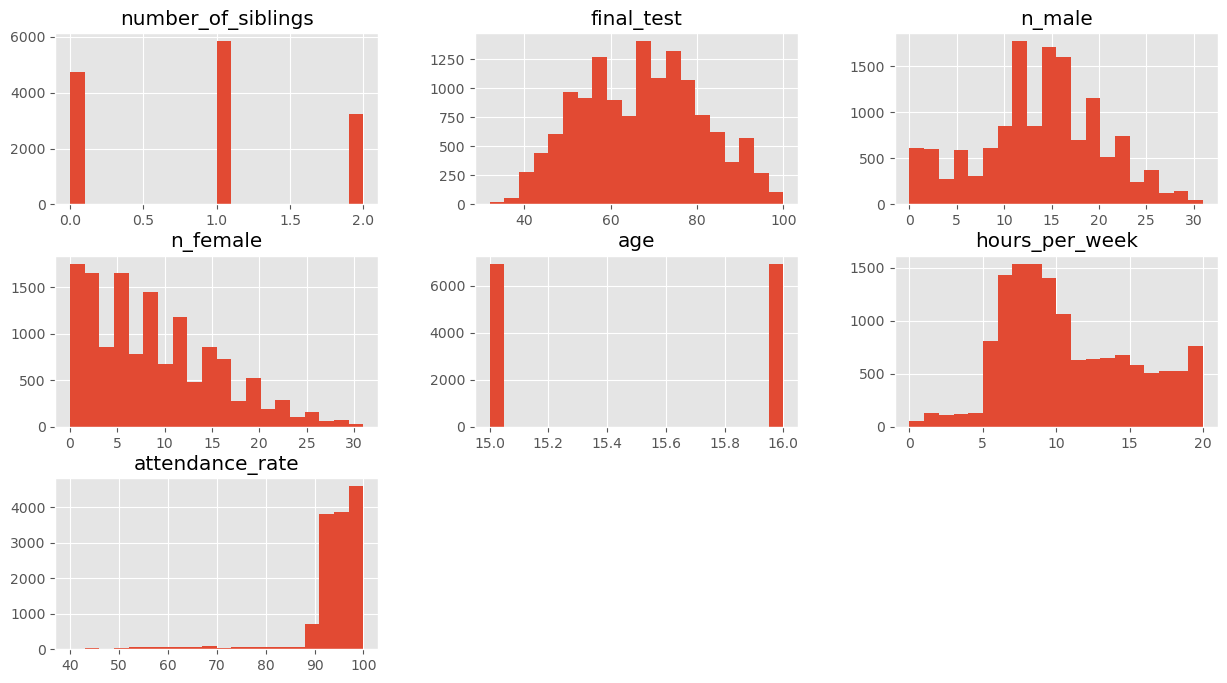

In [27]:
# Plot a histogram to see the distribution of the data of each numerical feature 
score.hist(bins=20, figsize=(15,8))
plt.show()

In [28]:
from scipy.stats import skew 
skew(score[['final_test', 'n_male', 'n_female', 'hours_per_week', 'attendance_rate']], bias=False)

array([ 0.06327888, -0.12451835,  0.72174483,  0.43373642, -3.6990062 ])

From the histograms above, I would take note of those features that need to be scaled or normalized. 

The features to be scaled and normalized would be 'final_test', 'n_male', 'n_female', 'hours_per_week', and 'attendance_rate'. The reason for normalization is to handle and reduce the skewness and scalign to make sure that no single feature dominates the learning process due to its scale.

I would not be normalizing or scaling the 'number_of_siblings' and 'age' because the values are discrete.

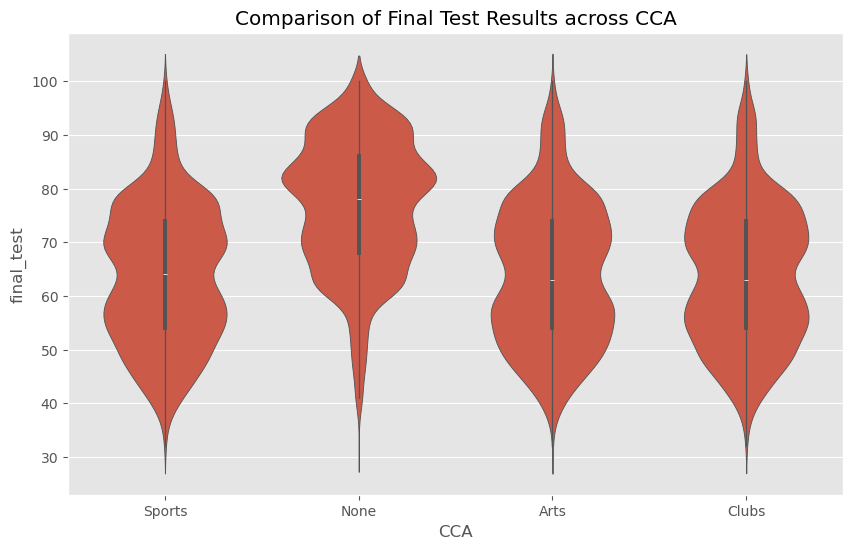

In [29]:
# Violin Plot 
plt.figure(figsize=(10,6))
sns.violinplot(x='CCA', y='final_test', data=score)
plt.title('Comparison of Final Test Results across CCA')
plt.show()

It can be seen that students without CCA has a slightly higher IQR, median and distribution 'final_test' scores. Those with CCAs have similar medians and distribution of 'final_test' scores. 

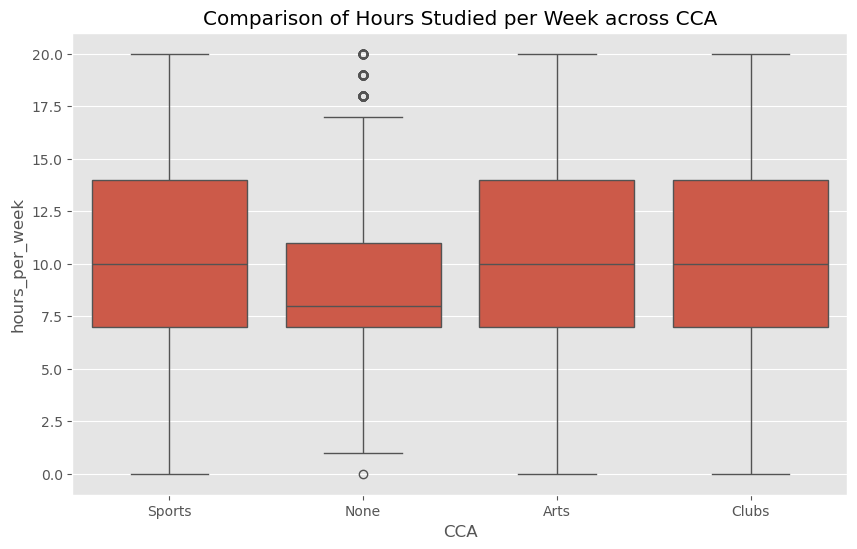

In [30]:
# Box / Boxen Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='CCA', y='hours_per_week', data=score)
plt.title('Comparison of Hours Studied per Week across CCA')
plt.show()

And looking at the comparison above, even though they have no CCA, but they studied less hours per week and still managed to have higher final test scores. This is a very interesting insight.

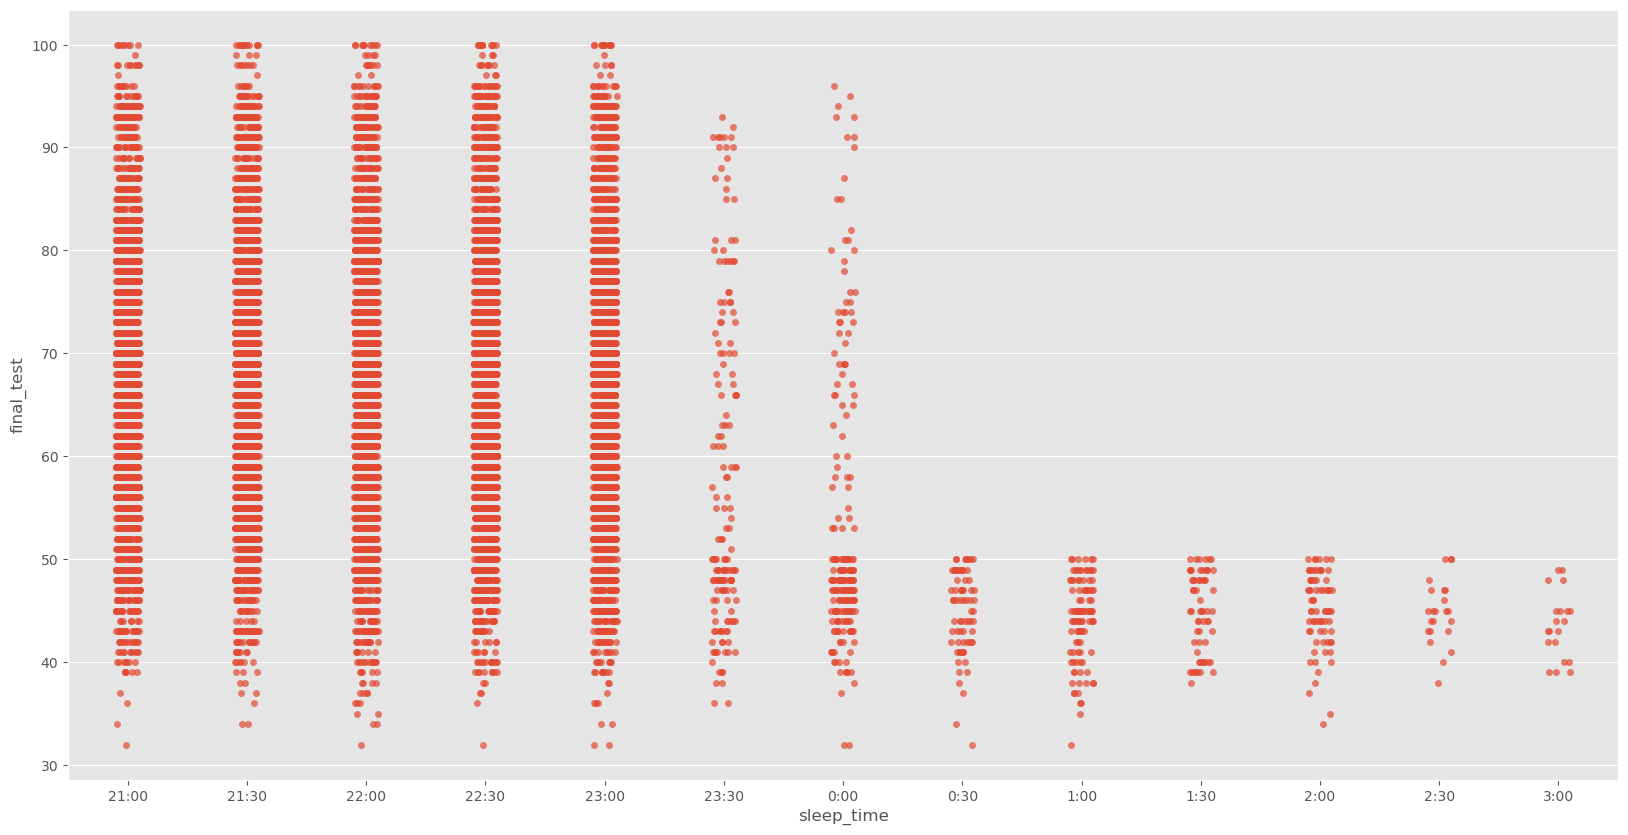

In [32]:
# Convert to datetime object
#score['sleep_time_datetime'] = pd.to_datetime(score.sleep_time, format='%H:%M')

# Convert the extracted characters to numeric
#score['sleep_time_datetime'] = score.sleep_time_datetime.dt.time

# Sort the values by the sleep time
#score_sorted = score.sort_values('sleep_time_datetime')
#------------------------------------------------------------
# Convert column to category dtype
score['sleep_time'] = score.sleep_time.astype('category')

# Reorder categories 
score['sleep_time'] = score.sleep_time.cat.reorder_categories(
    new_categories=['21:00', '21:30', '22:00', '22:30', '23:00', '23:30', '0:00', '0:30', '1:00', '1:30', '2:00', '2:30', '3:00'],
    ordered=True
)

# Strip Plot
plt.figure(figsize=(20,10))
sns.stripplot(x='sleep_time', y='final_test', alpha=0.7, data=score)
plt.show()

#------------------------------------------------------------
# Drop the 'sleep_time_datetime' column 
#score = score.drop(columns='sleep_time_datetime')

It can be seen that students who slept beyond 0:30 till 03:00 have scores between 30 to 50 while those who slept at 21:00 till 23:00 have a higher variance of scores with the max. score being 100. Those who slept between 23:30 and 0:00 shows a similar variance but without any max. scores of 100. 

In [33]:
# Identify relationships between numerical features using Correlation Matrix and Heatmap

# Select only the numeric columns for .corr()
numeric_score = score.select_dtypes(include='number')
numeric_score.dtypes

number_of_siblings      int64
final_test            float64
n_male                float64
n_female              float64
age                   float64
hours_per_week        float64
attendance_rate       float64
dtype: object

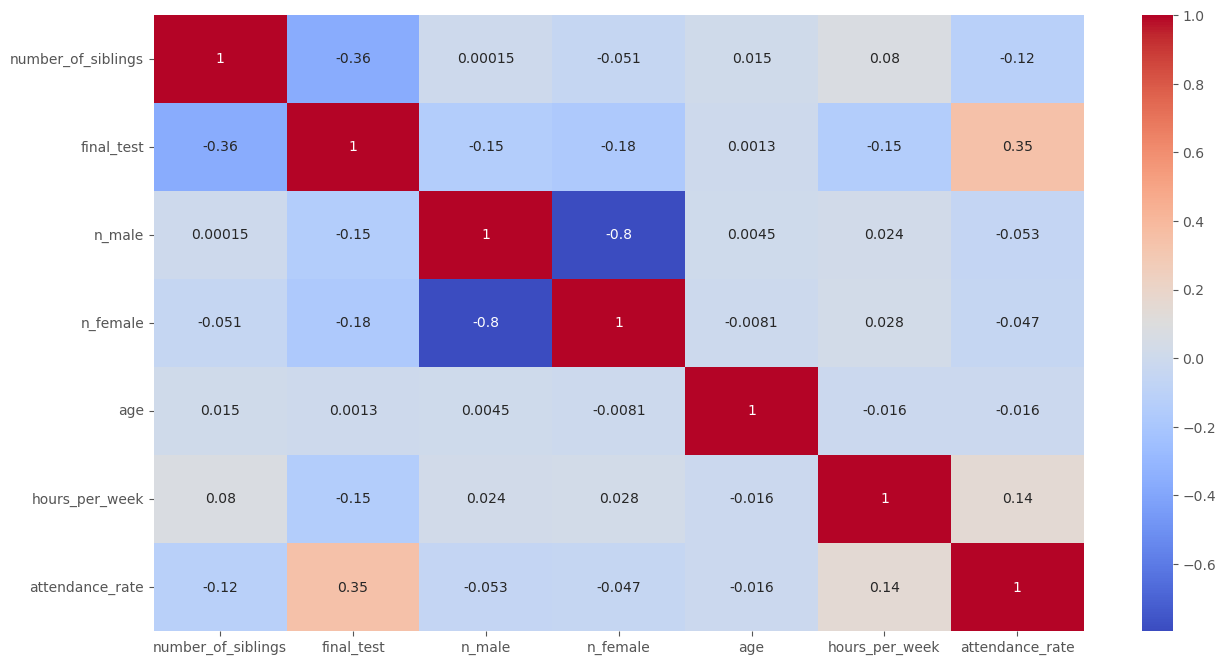

In [34]:
# Plot the Correlation Matrix using Heatmap 
plt.figure(figsize=(15,8))
sns.heatmap(numeric_score.corr(), annot=True, cmap='coolwarm')
plt.show()

One thing to note is that one of the primary weaknesses of correlation matrix is that it typically only accounts for linear correlations. However, there are still some interesting insights that can be drawn from the heatmap. With that being said, I will only look at any correlations above 0.3 and below -0.3 that are considered significant: 

1. There's a weak negative correlation of -0.36 between 'number_of_siblings' and 'final_test'.
2. There's a weak positive correlation of 0.35 between 'final_test' and 'attendance_rate'. It would also be worth seeing how the number_of_siblings will affect the attendance_rate and the final_test result.
3. There's a strong negative correlation of -0.8 between 'n_male' and 'n_female'.

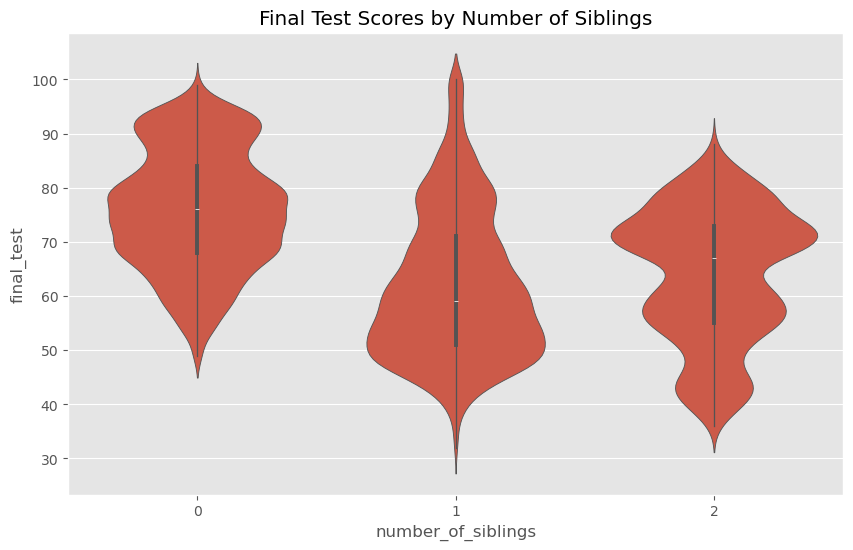

In [35]:
# To further investigate on correlation #1 above: 

# I decided to use violin plots instead of boxplots to have a more detailed view of the
# distribution by showing the density of the data at different values. 

# Violin Plot 
plt.figure(figsize=(10,6))
sns.violinplot(x='number_of_siblings', y='final_test', data=score)
plt.title('Final Test Scores by Number of Siblings')
plt.show()

It can be seen that the the median of the 'final_test' score of having 0 siblings is higher than having 1 or 2 siblings. This suggests that students with no siblings tend to perform better on average compared to those with siblings. 

However, the median and IQR range of the 'final_test' score of having 2 siblings are higher than that of having 1 sibling. This indicates that there is greater variability in the test scores for students with 2 siblings compared to those with 1 sibling. 

The distribution of the 'final_test' scores with 0 siblings shows a correlation of having higher 'final_test' scores than students with 1 or 2 siblings. The scores are more concentrated around the median as well.

The general trend seems to be that having no siblings correlates with higher 'final_test' scores, whereas having siblings correlates with lower scores. However, it's import to consider other features that might affect this relationship such as  the 'hours_per_week' of study or CCA to see how they interact with the 'number_of_siblings' and 'final_test' scores. 

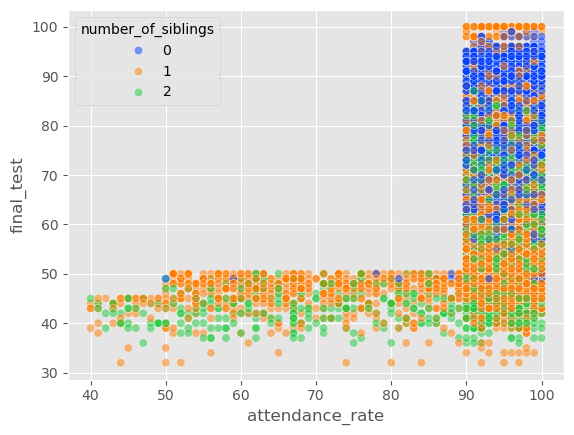

In [36]:
# To further investigate on correlation #2 above: 
# Plot a scatter plot to show the relationship
sns.scatterplot(x='attendance_rate', y='final_test', data=score, hue='number_of_siblings', palette='bright', alpha=0.5)
#ax.set_title('Final Test Scores by Attendance Rate, and No. of Siblings')
plt.show()

Students with attendance rate below 90 show a narrow range of final test scores, mostly clustered around lower scores (30-50). While students with attendance rate above 90 show a wide range of final test scores from 30 to 100. This suggests that poor attendance correlates with lower academic performance. 

With the high attendance rate (90-100), students with 0 siblings tend to perform slightly better than those with 1 or 2 siblings. This reinforces the observation that was made earlier in the violin plot above. 

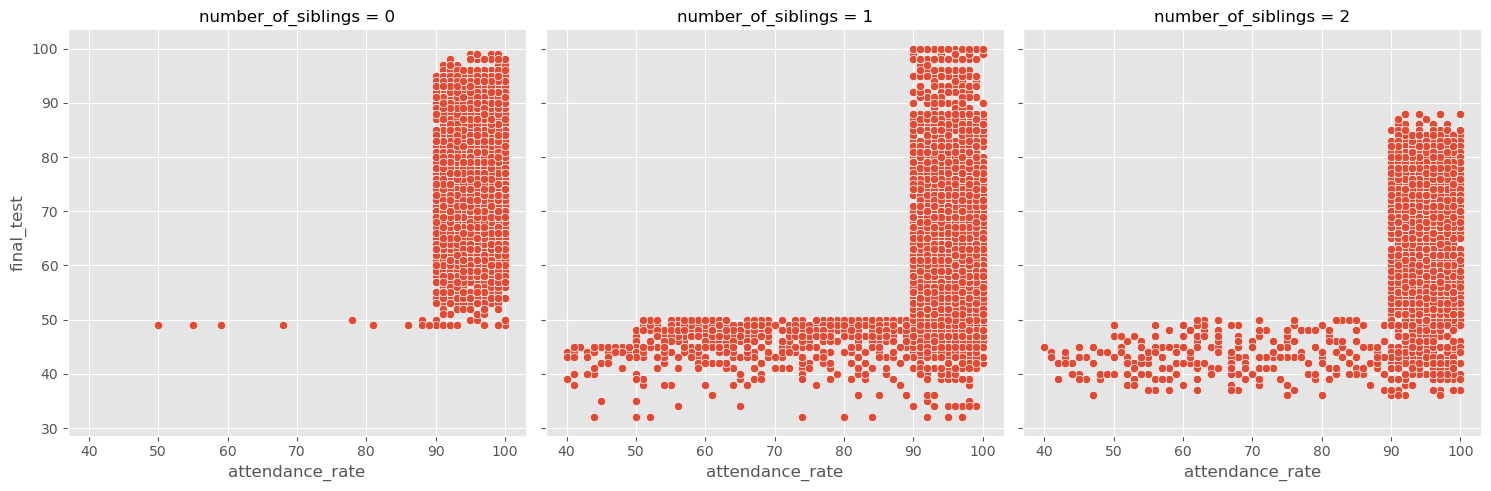

In [37]:
# Plot a relational plot to show the relationship
sns.relplot(x='attendance_rate', y='final_test', data=score, col='number_of_siblings', kind='scatter')
#ax.set_title('Final Test Scores by Attendance Rate, and No. of Siblings')
plt.show()

However, plotting the relation plots show that the number of siblings do not really correlate very strongly with the final test results. Instead, there is stronger evidence to show that the attendance rate has a stronger correlation with the final test results. 

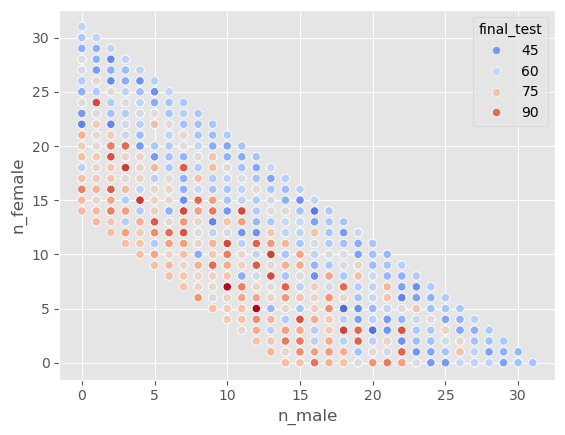

In [38]:
# Scatterplot
sns.scatterplot(x='n_male', y='n_female', hue='final_test', palette='coolwarm', data=score)
plt.show()

It shows that having anywhere between 0 - 25 of either male or female friends correlates to much higher 'final_test' scores. Students with more than ~25 female or male friends tend to have a lower final test score.

Summary of the hypotheses
1. Students without CCA has a higher median, IQR, distribution of final test scores as compared to those with CCAs.
2. Students without CCA also has a lower median, IQR and range for the number of hours studied per week, with the exception of a few outliers.
3. Students who slept between 21:00 and 23:00 have a higher variance of final test scores reaching a max. of 100 while students who slept between 23:30 and 00:00 start to have a small variance with lower max. score. Lastly, students who slept between 00:30 and 03:00 have very little variance in their final test scores and have a max. score of only 50.
4. Students with 0 or 1 sibling tend to perform slightly better than those with 2 siblings.
5. Students with an attendance rate of more than 90 shows a wide range of final scores from 30 to 100 while students with an attendance rate below 90 have lower scores from 30 to 50.
6. Having less than 25 male and female friends tend to leads to a higher final test score while having more than 25 female or male friends tend to leads to a lower final test score.


In [39]:
score.head()

,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport
0,0,Yes,Sports,Visual,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport
1,2,No,Sports,Auditory,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport
2,0,Yes,None,Visual,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport
3,0,No,Sports,Auditory,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport
4,0,No,Arts,Visual,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,22:30,6:30,private transport


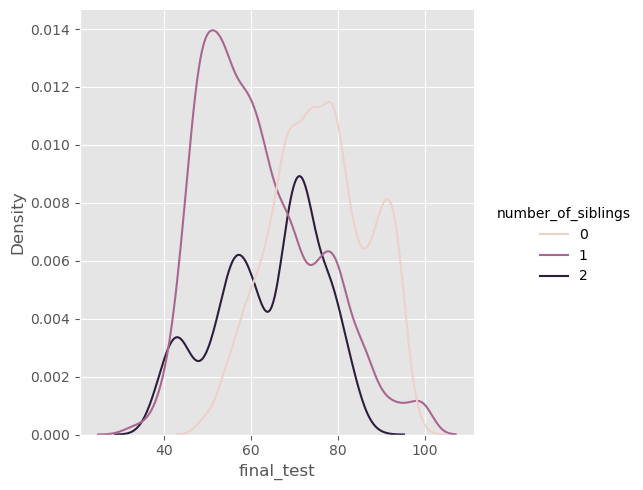

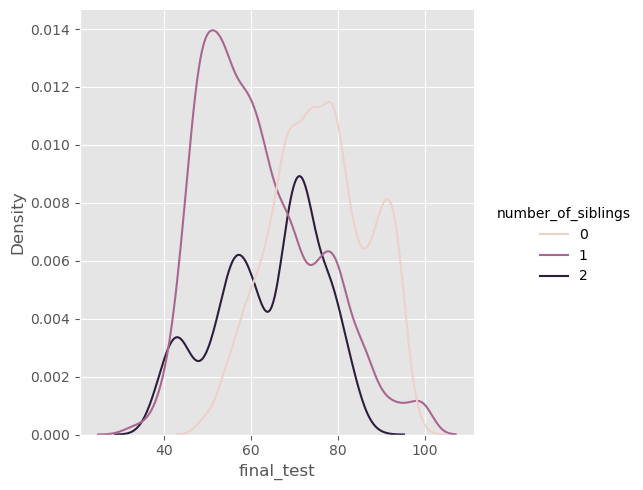

In [41]:
# Visualizing the data
sns.displot(data=score, x='final_test', hue='number_of_siblings', kind='kde')
plt.show()